#Imports

In [ ]:
#import required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator  
from sklearn.metrics import confusion_matrix

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load Train, Validation, and Test Data from Google Drive Folders

Based on descriptions and code from https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

In [ ]:
#Get user directory set up and parameters for data 
batch_size = 5 #@param
class_names = ['myotis_382', 'kerivoula_250', 'rhinolophys_907', 'hipposideros_785'] #@param

#Train-validation-test split
train_data_dir = '/content/drive/My Drive/Colab Notebooks/Deep Learning/ChiroVox_Bat_Spectrograms_Train_Test_Folders_More_Data/train' #@param
valid_data_dir = '/content/drive/My Drive/Colab Notebooks/Deep Learning/ChiroVox_Bat_Spectrograms_Train_Test_Folders_More_Data/val' #@param 
test_data_dir = '/content/drive/My Drive/Colab Notebooks/Deep Learning/ChiroVox_Bat_Spectrograms_Train_Test_Folders_More_Data/test' #@param 

#Normalize the images on the [0,255] scale
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

#Set up connection to training data folder
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
    )

#Set up connection to validation data folder
valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

#Set up connection to test data folder
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 1383 images belonging to 4 classes.
Found 204 images belonging to 4 classes.
Found 407 images belonging to 4 classes.


#Compile the Model and Print Summary

In [ ]:
#Load DenseNet from Keras
model = tf.keras.applications.DenseNet201(
    input_tensor=None,
    input_shape=None,#(847, 456, 3),
    pooling=None,
    weights=None,
    classes=len(class_names),
    #classifier_activation="softmax",
)

#Use Adam optimizer, categorical_crossentropy loss, and measure accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

#print model summary
model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

#Train the Model

In [ ]:
#Train the model, saving the weights to google drive
checkpoint = keras.callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/Deep Learning/DenseNet_Weights/", save_weights_only=True) #saves models at file path 

#use the train_generator to get data from the training folder
train_model_stats = model.fit_generator(  
     generator=train_generator,  
     epochs=30,
     verbose=1,
     validation_data = valid_generator,
     callbacks=[checkpoint]) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
277/277 [==============================] - 672s 2s/step - loss: 1.4461 - accuracy: 0.3601 - val_loss: 1.4317 - val_accuracy: 0.3873
Epoch 2/30
277/277 [==============================] - 49s 175ms/step - loss: 1.3570 - accuracy: 0.3695 - val_loss: 77.4322 - val_accuracy: 0.3627
Epoch 3/30
277/277 [==============================] - 48s 174ms/step - loss: 1.3482 - accuracy: 0.3695 - val_loss: 256.2488 - val_accuracy: 0.1716
Epoch 4/30
277/277 [==============================] - 49s 175ms/step - loss: 1.3543 - accuracy: 0.3774 - val_loss: 4.2769 - val_accuracy: 0.4314
Epoch 5/30
277/277 [==============================] - 49s 176ms/step - loss: 1.3010 - accuracy: 0.4165 - val_loss: 1.3034 - val_accuracy: 0.4706
Epoch 6/30
277/277 [==============================] - 49s 175ms/step - loss: 1.2752 - accuracy: 0.4338 - val_loss: 1.7246 - val_accuracy: 0.4657
Epoch 7/30
277/277 [==============================] - 50s 179ms/step - loss: 1.2354 - accuracy: 0.4353 - val_loss: 1.3590 - val_a

In [ ]:
#Return the final validation accuracy
model.evaluate_generator(generator=valid_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.3494296073913574, 0.8921568393707275]

#Plot Training and Validation Curves

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


82/82 [==============================] - 183s 2s/step
{'loss': [1.446075677871704, 1.3569626808166504, 1.3481637239456177, 1.3542760610580444, 1.300972819328308, 1.275172472000122, 1.2353607416152954, 1.2403203248977661, 1.1417704820632935, 1.1418548822402954, 1.077332854270935, 0.9777714014053345, 0.8692551851272583, 0.777313232421875, 0.7284725308418274, 0.6375393271446228, 0.6097578406333923, 0.5249006152153015, 0.5247448086738586, 0.4564782381057739, 0.4101417660713196, 0.4142482578754425, 0.35442888736724854, 0.3731701076030731, 0.34795257449150085, 0.3041607141494751, 0.27212151885032654, 0.24156403541564941, 0.2653697729110718, 0.21972344815731049], 'accuracy': [0.3600867688655853, 0.36948662996292114, 0.36948662996292114, 0.37744033336639404, 0.41648590564727783, 0.43383947014808655, 0.4352855980396271, 0.41793203353881836, 0.46493130922317505, 0.45480838418006897, 0.5198842883110046, 0.5921908617019653, 0.6413593888282776, 0.687635600566864, 0.6992046236991882, 0.7433116436004

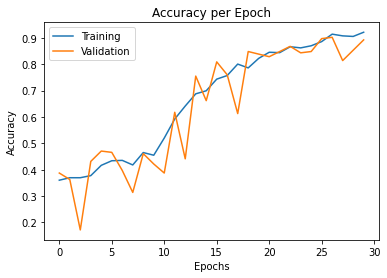

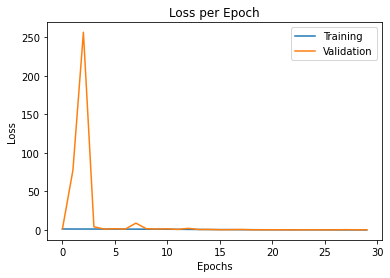

In [ ]:
#Graph the training and validation accuracy and loss
test_generator.reset()
pred = model.predict_generator(test_generator, verbose=1)

print(train_model_stats.history)
plt.plot(train_model_stats.history['accuracy'])
plt.plot(train_model_stats.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend(['Training', 'Validation'])
plt.show()

plt.plot(train_model_stats.history['loss'])
plt.plot(train_model_stats.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend(['Training', 'Validation'])
plt.show()

#Save the Results

In [ ]:
#Reset the test_generator to ensure this is the first time looking at the test data
test_generator.reset()

#Make predictions on the test data
pred = model.predict_generator(generator=test_generator, verbose=1)

#Translate the numeric predictions into the labels
predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

#Save the predictions to a csv
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("/content/drive/My Drive/Colab Notebooks/Deep Learning/DenseNet_results.csv",index=False)

print(results.columns)

results[['Ground_Truth', 'Image_Name']] = results['Filename'].str.split('/', 1, expand=True)

print(results.head())

print(predictions)
print(labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


82/82 [==============================] - 7s 89ms/step
Index(['Filename', 'Predictions'], dtype='object')
                                  Filename       Predictions  \
0  hipposideros_785/A000313_DFGFZKQEJQ.png  hipposideros_785   
1  hipposideros_785/A000318_JFBBFZRYOG.png  hipposideros_785   
2  hipposideros_785/A000397_UTOBGDJZNS.png  hipposideros_785   
3  hipposideros_785/A000421_KHVOXBEYKG.png   rhinolophus_907   
4  hipposideros_785/A000428_EMDWTZHGQM.png     kerivoula_250   

       Ground_Truth              Image_Name  
0  hipposideros_785  A000313_DFGFZKQEJQ.png  
1  hipposideros_785  A000318_JFBBFZRYOG.png  
2  hipposideros_785  A000397_UTOBGDJZNS.png  
3  hipposideros_785  A000421_KHVOXBEYKG.png  
4  hipposideros_785  A000428_EMDWTZHGQM.png  
['hipposideros_785', 'hipposideros_785', 'hipposideros_785', 'rhinolophus_907', 'kerivoula_250', 'hipposideros_785', 'myotis_364', 'rhinolophus_907', 'kerivoula_250', 'myotis_364', 'rhinolophus_907', 'rhinolophus_907', 'hipposideros_7

#Calculate the Precision, Recall, and F1 Score

In [ ]:
label_map = dict((v,k) for k,v in labels.items())
results_encoded = results.copy()
results_encoded = results_encoded.replace({'Predictions':label_map})
results_encoded = results_encoded.replace({'Ground_Truth':label_map})

print(results_encoded.head())

#y-axis is actual x-axis is predicted and order goes:
cm=confusion_matrix(results_encoded['Ground_Truth'].values, results_encoded['Predictions'].values)
print('===============CONFUSION MATRIX===============')
print(cm)

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

precision = TP / (TP + FP)
recall = TP / (TP + FN)
print('\n==================PRECISION==================')
print(precision)
print('\n===================RECALL===================')
print(recall)

f1_score = 2 * ( (precision * recall) / (precision + recall) )
print('\n==================F1 SCORE==================')
print(f1_score)

print('\n==================ACCURACY==================')
print(ACC)
print(ACC)

                                  Filename  Predictions  Ground_Truth  \
0  hipposideros_785/A000313_DFGFZKQEJQ.png            0             0   
1  hipposideros_785/A000318_JFBBFZRYOG.png            0             0   
2  hipposideros_785/A000397_UTOBGDJZNS.png            0             0   
3  hipposideros_785/A000421_KHVOXBEYKG.png            3             0   
4  hipposideros_785/A000428_EMDWTZHGQM.png            1             0   

               Image_Name  
0  A000313_DFGFZKQEJQ.png  
1  A000318_JFBBFZRYOG.png  
2  A000397_UTOBGDJZNS.png  
3  A000421_KHVOXBEYKG.png  
4  A000428_EMDWTZHGQM.png  
===============CONFUSION MATRIX===============
[[60 23 21 46]
 [21  7 12 23]
 [26 10 17 16]
 [43 17 31 34]]

==================PRECISION==================
[0.4        0.12280702 0.20987654 0.28571429]

===================RECALL===================
[0.4        0.11111111 0.24637681 0.272     ]

==================F1 SCORE==================
[0.4        0.11666667 0.22666667 0.27868852]

=======

In [ ]:
model.evaluate_generator(generator=test_generator, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


82/82 [==============================] - 8s 93ms/step - loss: 0.4357 - accuracy: 0.8600


[0.43566206097602844, 0.859950840473175]